In [19]:
import pandas as pd
from sklearn.cluster import KMeans
from kmodes.kmodes import KModes
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


In [21]:
data = pd.read_csv('../data/ocorrencias_clean_extras.csv', sep = ',')


# Select relevant features for clustering
features = ['NumeroMeiosTerrestresEnvolvidos', 'NumeroOperacionaisTerrestresEnvolvidos', 'NumeroMeiosAereosEnvolvidos', 'NumeroOperacionaisAereosEnvolvidos', 'Densidade']

# Scale the features
scaler = StandardScaler()
data[features] = scaler.fit_transform(data[features])

# Run K-means clustering algorithm
kmeans = KMeans(n_clusters=4, random_state=0).fit(data[features])

# Get cluster labels for each data point
labels = kmeans.labels_

# Add cluster labels to the original DataFrame
data['Cluster'] = labels

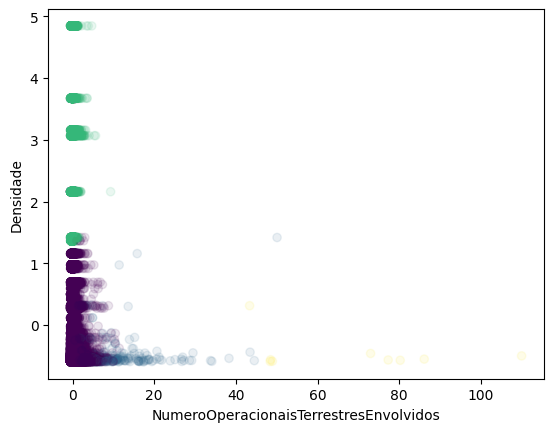

In [22]:
plt.scatter(data['NumeroOperacionaisTerrestresEnvolvidos'], data['Densidade'], c=data['Cluster'], cmap='viridis', alpha=0.1)
plt.xlabel('NumeroOperacionaisTerrestresEnvolvidos')
plt.ylabel('Densidade')
plt.show()

In [23]:
# Select the categorical column 'Distrito' for clustering
X = data[['Distrito']]

# Initialize the k-modes algorithm with the number of clusters you want
km = KModes(n_clusters=5, init='Huang', n_init=5, verbose=1)

# Fit the algorithm to the data
clusters = km.fit_predict(X)

# Add the cluster labels to the original dataframe
data['cluster'] = clusters

# Group the data by the cluster labels
grouped = data.groupby('cluster')

# Compute summary statistics for each group
profile = grouped['Numero', 'NumeroMeiosTerrestresEnvolvidos', 'NumeroOperacionaisTerrestresEnvolvidos', 'NumeroMeiosAereosEnvolvidos', 'NumeroOperacionaisAereosEnvolvidos'].agg(['count', 'mean', 'std'])

# Print the cluster profile
print(profile)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 63160.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 80890.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 63809.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 76369.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 80482.0
Best run was number 1
        Numero                             NumeroMeiosTerrestresEnvolvidos  \
         count          mean           std                           count   
cluster                                                                      
0        83274  2.016095e+12  5.517332e+07                           83274   
1         9002  2.016

/tmp/ipykernel_160497/4212391235.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  profile = grouped['Numero', 'NumeroMeiosTerrestresEnvolvidos', 'NumeroOperacionaisTerrestresEnvolvidos', 'NumeroMeiosAereosEnvolvidos', 'NumeroOperacionaisAereosEnvolvidos'].agg(['count', 'mean', 'std'])


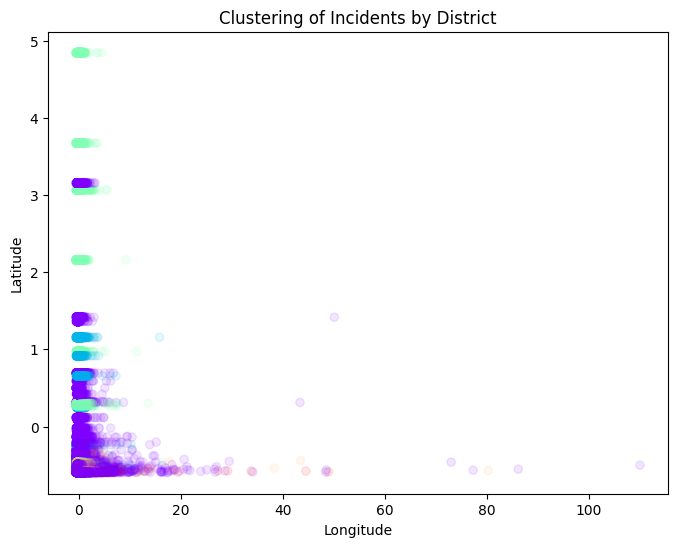

In [26]:


fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(data['NumeroOperacionaisTerrestresEnvolvidos'], data['Densidade'], c=clusters, cmap='rainbow', alpha=0.1)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Clustering of Incidents by District')
plt.show()

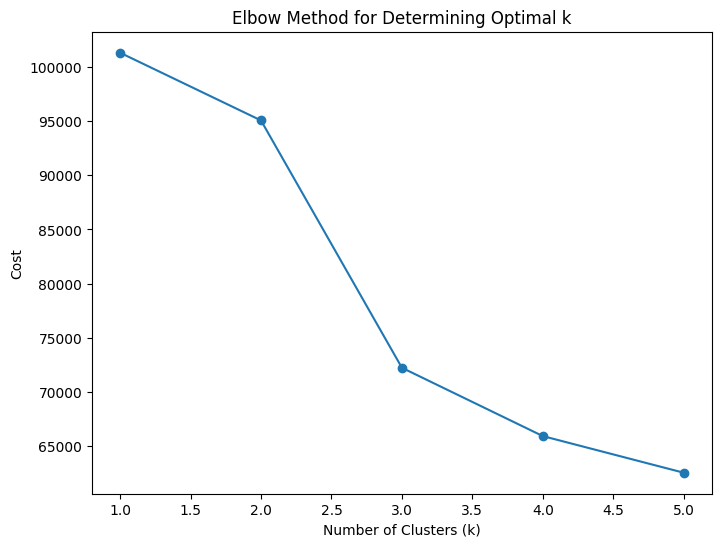

In [29]:
#Plotting the different clusters for profilling districts

df = pd.read_csv('../data/ocorrencias_clean_extras.csv', sep = ',')

# Select the column 'Distrito' for clustering
X = df[['Distrito']]

# Initialize a list to store the cost (i.e., the sum of distances between each point and its nearest centroid) for different values of k
cost = []

# Set the range of values of k to try
k_range = range(1, 6)

# Iterate over the range of values of k
for k in k_range:
    # Initialize the kmodes algorithm with k clusters
    km = KModes(n_clusters=k, init='Huang', n_init=5, verbose=0)
    
    # Fit the algorithm to the data
    km.fit(X)
    
    # Calculate the cost
    cost.append(km.cost_)

# Plot the cost vs. the number of clusters
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(k_range, cost, marker='o')
ax.set_xlabel('Number of Clusters (k)')
ax.set_ylabel('Cost')
ax.set_title('Elbow Method for Determining Optimal k')
plt.show()


In [32]:
km = KModes(n_clusters=8, init='Huang', n_init=5, verbose=0)
#print which clusters belong together
clusters = km.fit_predict(X)
df['cluster'] = clusters
df.groupby('cluster')['Distrito'].value_counts()


cluster  Distrito        
0        PORTO               20114
         SANTARÉM             7511
         FARO                 6711
         VISEU                6258
         COIMBRA              5380
         BRAGANÇA             3385
         VILA REAL            3265
         VIANA DO CASTELO     2976
         GUARDA               2775
         BEJA                 2394
         ÉVORA                2145
1        BRAGA                9008
2        LISBOA              20281
3        SETÚBAL              9002
4        PORTALEGRE           2440
5        LEIRIA               6314
6        CASTELO BRANCO       2738
7        AVEIRO               8912
Name: Distrito, dtype: int64

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(data['NumeroOperacionaisTerrestresEnvolvidos'], data['NumeroOperacionaisTerrestresEnvolvidos'], c=clusters, cmap='rainbow', alpha=0.1)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Clustering of Incidents by District')
plt.show()